# Lecture 13: Control

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Booleans

In [2]:
x = 3
y = 4
y > x


True

In [3]:
10/2 != y

True

In [4]:
'Dog' > 'Cat'

True

In [5]:
a = np.arange(11, 50)
a

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49])

In [6]:
a > 30

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [7]:
a == 15

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [8]:
def teen(x):
    return 13 <= x <= 19

[teen(10), teen(15), teen(20)]

[False, True, False]

In [9]:
ages = Table().with_column('Age', a)
ages

Age
11
12
13
14
15
16
17
18
19
20
... (29 rows omitted)

In [10]:
ages = ages.with_column('Teenager', ages.apply(teen, 'Age'))
ages

Age  | Teenager
11   | False
12   | False
13   | True
14   | True
15   | True
16   | True
17   | True
18   | True
19   | True
20   | False
... (29 rows omitted)

## Combining Booleans

In [11]:
x = 3
y = 4

In [12]:
x < 4 and y > 4

False

In [15]:
x < 4 or y == 4

True

In [14]:
not (x < 4 or y > 4)

False

In [16]:
True + 0

1

In [17]:
False + 0

0

In [18]:
sum([False, True, True, False, True])

3

A. 0  
B. 1  
C. 2  
D. 3  
E. 4  

In [19]:
ages

Age  | Teenager
11   | False
12   | False
13   | True
14   | True
15   | True
16   | True
17   | True
18   | True
19   | True
20   | False
... (29 rows omitted)

In [20]:
ages.column('Teenager')

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
sum(ages.column('Teenager'))

7

In [22]:
np.count_nonzero(ages.column('Teenager'))

7

## Random choice

In [23]:
coin = make_array('Heads', 'Tails')
coin

array(['Heads', 'Tails'], dtype='<U5')

In [29]:
np.random.choice(coin)

'Tails'

In [32]:
np.random.choice(coin, 10)

array(['Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads',
       'Tails', 'Heads', 'Heads'], dtype='<U5')

In [33]:
d6 = np.arange(1,6+1)
d6

array([1, 2, 3, 4, 5, 6])

In [36]:
np.random.choice(d6)

2

In [40]:
np.random.choice(d6, 3)

array([6, 6, 3])

What are the possible results?

A. 1-6  
B. 1-18  
C. multiples of 3 between 1-18  
D. 3-18  
E. none of the above

What if we made the code be:

In [42]:
sum(np.random.choice(d6, 3))

9

In [51]:
two_groups = make_array('treatment', 'control')
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['control', 'control', 'treatment', 'treatment', 'treatment',
       'control', 'treatment', 'treatment', 'control', 'treatment'],
      dtype='<U9')

In [45]:
outcomes == 'control'

array([False,  True,  True, False, False,  True, False, False,  True,
        True])

In [ ]:
#sum(outcomes)

In [52]:
sum(outcomes == 'control')

4

In [53]:
sum(outcomes == 'treatment')

6

## Discussion Question

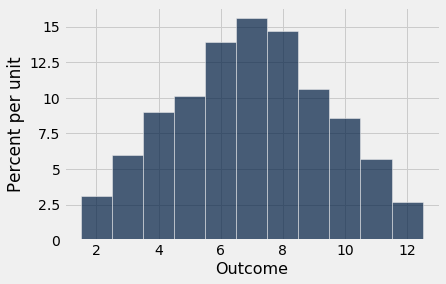

In [54]:
outcomes = np.random.choice(d6, 1000) + np.random.choice(d6, 1000)
Table().with_column('Outcome', outcomes).hist('Outcome', bins=np.arange(1.5,13))

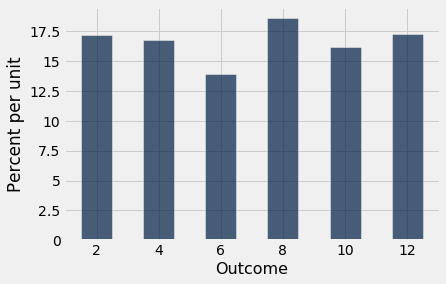

In [55]:
outcomes = 2 * np.random.choice(d6, 1000)
Table().with_column('Outcome', outcomes).hist('Outcome', bins=np.arange(1.5,13))

## Conditional Statements

In [58]:
x = 0
if x > 0:
    print('positive')
elif x < 0:
    print('negative')
else:
    print('zero')

zero


In [60]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

In [63]:
sign(0)

'zero'

In [70]:
x = 0
if x > 0:
    print('Positive')
elif x < 0:
    print("Negative")

## For Statements

In [64]:
np.arange(4)

array([0, 1, 2, 3])

In [66]:
for i in np.arange(24):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23


In [71]:
coin

array(['Heads', 'Tails'], dtype='<U5')

In [73]:
sum(np.random.choice(coin, 100) == 'Heads')

52

That was one experiment (flipping 100 times).  What if we wanted to repeat 10,000 experiments, and produce a table of results?

In [74]:
num_heads = make_array(sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([53], dtype=int64)

In [75]:
num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([53, 52], dtype=int64)

In [76]:
num_heads = make_array()
for i in np.arange(10000):
    num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([48., 39., 42., ..., 51., 52., 50.])

In [77]:
len(num_heads)

10000

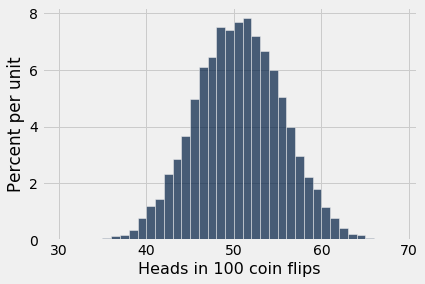

In [78]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [79]:
most = t.group('Heads in 100 coin flips')\
        .where('Heads in 100 coin flips', are.between(40, 60))
most.show()

In [80]:
sum(most.column('count')) / t.num_rows * 100

95.36

In [ ]:
#noaccident that it's 95%